Python Workshop 1: basic coding and exploratory data analysis

https://colab.research.google.com/

In [1]:
# With Python, you can do prety much everything you can do in R -- and more! 
# All in relatively few lines of code
# Today we will cover the Python code to achieve results similar to what previous R workshops have focused on
# and also explore some Python idiosyncracies and useful functions, tips, and tricks

# In the notebook environment, output is displayed directly below the code block it is in 
print('Hello world!')

Hello world!


In [2]:
# We actually don't even need to use print() to see our output when using a notebook
'Hello world!'

'Hello world!'

In [3]:
# Just like R uses packages to extend its base functionality, Python has libraries 
# Let's import the libraries we will use today -- aliases make calling functions from the library simpler

# Importing libraries
# import [library] as [alias]
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Let's save some simple variables 
# In a notebook, any variable defined like this is accessible in the global environment 
# (i.e., we can use the value of this variable in any other code block in our notebook)
x = 'this is a string'
y = 7
z = 3.14

In [5]:
# The type() function tells us the type (i.e., class) of object it considers 
type(x)
type(y)
type(z)

float

In [6]:
# If we want to have multiple lines of output, we need to print each line 
# The notebook will otherwise just give us the output of our final line of code 
# We can also change the datatype of the two numbers to a string so we can print full sentences describing our variables
# \ is the escape character in Python -- use it before quotations to include quotes in your printed string

print('\"' + x + '\" is a ' + str(type(x)) + '.')
print('\"' + str(y) + '\" is a ' + str(type(y)) + '.')
print('\"' + str(z) + '\" is a ' + str(type(z)) + '.')

"this is a string" is a <class 'str'>.
"7" is a <class 'int'>.
"3.14" is a <class 'float'>.


In [7]:
# Notice that we copied and pasted several times above
# Whenever we are copying and pasting, we are defeating one of the main points of coding: efficiency! 

# Let's instead make a simple loop to achieve the same output as above in fewer lines 
# First, we'll put our variables in a list (notice how multiple data types can be in a list)
var_list = [x,y,z]
type(var_list)

list

In [8]:
# Now we'll loop through our list to print the senteces equivalent to what we have above
for variable in var_list: 
    print('\"' + str(variable) + '\" is a ' + str(type(variable)) + '.')

"this is a string" is a <class 'str'>.
"7" is a <class 'int'>.
"3.14" is a <class 'float'>.


In [9]:
# We might want to use this pattern again, so let's make it a function 
def var_type_phrase(var): 
    return '\"' + str(var) + '\" is a ' + str(type(var)) + '.'

In [10]:
for variable in var_list:
    print(var_type_phrase(variable))

"this is a string" is a <class 'str'>.
"7" is a <class 'int'>.
"3.14" is a <class 'float'>.


In [11]:
# Let's now take a step back and go over some key Python terms
# When we call the type() function, we are seeing what the <class> of an individual <object> is
# Individual objects can have <attributes> specific to the object's class 
# Individual objects can also have <methods> which are defined by the object's class 
# (think of methods like class-specific functions)

# Let's see an example of this
# First, make a list of numbers
num_list = [1,2,5,8]
print(num_list)

# Our num_list object is indeed of the list class
print(type(num_list))

# A max() function exists to find the maximum value of our list 
# This is NOT a method of the list class -- just a regular function 
print(max(num_list))
print('\n')

# We can change the object type by creating a numpy array out of our list 
num_array = np.array(num_list)
print(num_array)

# Let's check the type 
print(type(num_array))

# We can also use the max() function 
print(max(num_array))

# But a max() method also exists for objects of the numpy array class that gives the same result!
print(num_array.max())

# attributes are more like properties of the object
# shape is an attribute of numpy arrays 
print(num_array.shape)
print('\n')

# With methods, we can change attributes 
num_array_reshaped = num_array.reshape(2,2)
print(num_array_reshaped)
print(num_array_reshaped.shape)

[1, 2, 5, 8]
<class 'list'>
8


[1 2 5 8]
<class 'numpy.ndarray'>
8
8
(4,)


[[1 2]
 [5 8]]
(2, 2)


In [12]:
# One more more useful Python programming thing before we dive into some data!
# Suppose that you have a list of objects and you want to figure out how many even integers there are in that list
# The modulo % returns the remainder of y divided by x if given y % x, so if y % 2 == 0, y is even  
4 % 2 

0

In [13]:
5 % 2

1

In [14]:
potential_evens = [2,4,5,1,8,9,48]
true_evens = []
odds = []

for num in potential_evens:
    if num % 2 == 0:
        true_evens.append(num)
    else:
        odds.append(num)

print(true_evens)
print(len(true_evens))
print(odds)

[2, 4, 8, 48]
4
[5, 1, 9]


In [15]:
# But in Python, there is an even better, shorter, faster, more "pythonic" way to do this!
# It's called a list comprehension
true_evens = [num for num in potential_evens if num % 2 == 0]
true_evens

[2, 4, 8, 48]

In [16]:
# What if, however, our list of potential_evens contains objects that are not even numbers?
potential_evens = [2,4,5,1,8,9,48,'bus']
true_evens = []
not_evens = []

for obj in potential_evens:
    if obj % 2 == 0:
        true_evens.append(obj)
    else:
        not_evens.append(obj)

TypeError: not all arguments converted during string formatting

In [17]:
# We can use a try-except statement to deal with an error if it comes up
# This is not really possible to do well with a list comprehension 
potential_evens = [2,4,5,1,8,9,48,'bus']
true_evens = []
not_evens = []

for obj in potential_evens:
    try:
        if obj % 2 == 0:
            true_evens.append(obj)
        else:
            not_evens.append(obj)
    except:
        not_evens.append(obj)
        
print(true_evens)
print(not_evens)

[2, 4, 8, 48]
[5, 1, 9, 'bus']


In [18]:
# We will be looking at some Census data on healthcare trends 
# We can turn this into a nice panel dataset -- there are cross-sectional observations 
# at regularly spaced (yearly) intervals

# Importing data from a csv using the read_csv function from pandas (recall that pd is the pandas alias)
df = pd.read_csv('../All_years.csv')

# Look at the first five rows with the head() method 
df.head()

,year,cpi99,statefip,perwt,sex,age,marst,race,raced,hcovany,hinscaid,hinscare,educ,educd,inctot
0,2008,0.774,6,103,2,32,6,2,200,2,1,1,6,64,25500
1,2008,0.774,48,76,1,37,2,1,100,1,1,1,10,101,200000
2,2008,0.774,6,77,2,44,1,1,100,2,1,1,10,101,65000
3,2008,0.774,24,125,2,72,5,1,100,2,2,2,4,40,7600
4,2008,0.774,26,32,2,77,1,1,100,2,1,2,6,63,5800


In [ ]:
# If using Google Colab, add this file to your Google Drive:
# https://drive.google.com/file/d/1C4H8DUVjaFt2fzXIfOMaa2Pjmd0n5sLe/view

# Click through anything that pops up and follow instructions
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Make the path after 'drive/MyDrive/' the path to where you have the file stored
df = pd.read_csv('drive/MyDrive/Oeconomica/WorkshopMaterials2020-2021/PythonWorkshops/All_years.csv')

df.head()

In [19]:
# We can also look at the first 10 rows if we want 
df.head(10)

,year,cpi99,statefip,perwt,sex,age,marst,race,raced,hcovany,hinscaid,hinscare,educ,educd,inctot
0,2008,0.774,6,103,2,32,6,2,200,2,1,1,6,64,25500
1,2008,0.774,48,76,1,37,2,1,100,1,1,1,10,101,200000
2,2008,0.774,6,77,2,44,1,1,100,2,1,1,10,101,65000
3,2008,0.774,24,125,2,72,5,1,100,2,2,2,4,40,7600
4,2008,0.774,26,32,2,77,1,1,100,2,1,2,6,63,5800
5,2008,0.774,25,83,1,17,6,1,100,2,1,1,5,50,0
6,2008,0.774,45,80,2,44,1,1,100,2,1,1,11,114,60000
7,2008,0.774,53,97,2,19,6,1,100,2,1,1,6,63,0
8,2008,0.774,4,56,2,73,5,1,100,2,1,2,5,50,10800
9,2008,0.774,37,71,2,63,1,1,100,2,1,2,7,71,5900


In [20]:
# Or the last ten 
df.tail(10)

,year,cpi99,statefip,perwt,sex,age,marst,race,raced,hcovany,hinscaid,hinscare,educ,educd,inctot
3429152,2018,0.663,12,73,2,35,1,1,100,2,1,1,10,101,510
3429153,2018,0.663,39,138,1,71,1,6,678,2,1,2,6,64,35230
3429154,2018,0.663,8,53,2,71,5,1,100,2,1,2,11,114,51110
3429155,2018,0.663,53,115,1,37,4,1,100,2,1,1,11,114,95000
3429156,2018,0.663,48,77,1,44,1,8,841,2,2,1,8,81,35000
3429157,2018,0.663,12,86,2,33,1,1,100,2,1,1,11,115,36000
3429158,2018,0.663,36,78,2,44,1,1,100,2,1,1,6,65,65000
3429159,2018,0.663,6,61,1,27,2,7,700,2,2,1,3,30,700
3429160,2018,0.663,36,56,2,90,4,1,100,2,1,2,4,40,39300
3429161,2018,0.663,36,68,1,49,6,1,100,2,1,1,6,64,52000


In [21]:
# The info() method lists the variables and datatype of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3429162 entries, 0 to 3429161
Data columns (total 15 columns):
 #   Column    Dtype  
---  ------    -----  
 0   year      int64  
 1   cpi99     float64
 2   statefip  int64  
 3   perwt     int64  
 4   sex       int64  
 5   age       int64  
 6   marst     int64  
 7   race      int64  
 8   raced     int64  
 9   hcovany   int64  
 10  hinscaid  int64  
 11  hinscare  int64  
 12  educ      int64  
 13  educd     int64  
 14  inctot    int64  
dtypes: float64(1), int64(14)
memory usage: 392.4 MB


In [22]:
# The describe() method gives summary statistics for all relevant variables 
df.describe()

,year,cpi99,statefip,perwt,sex,age,marst,race,raced,hcovany,hinscaid,hinscare,educ,educd,inctot
count,3.429162e+06,3.429162e+06,3.429162e+06,3.429162e+06,3.429162e+06,3.429162e+06,3.429162e+06,3.429162e+06,3.429162e+06,3.429162e+06,3.429162e+06,3.429162e+06,3.429162e+06,3.429162e+06,3.429162e+06
mean,2.013061e+03,7.211128e-01,2.765057e+01,1.014881e+02,1.512115e+00,4.054053e+01,3.601857e+00,1.766201e+00,1.784144e+02,1.891136e+00,1.176130e+00,1.196557e+00,5.973344e+00,6.216537e+01,1.786708e+06
std,3.158196e+00,3.650449e-02,1.603609e+01,8.032649e+01,4.998533e-01,2.351276e+01,2.309683e+00,1.822552e+00,1.864583e+02,3.114688e-01,3.809310e-01,3.973948e-01,3.235699e+00,3.216469e+01,3.791467e+06
min,2.008000e+03,6.630000e-01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+02,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-1.999800e+04
25%,2.010000e+03,6.940000e-01,1.200000e+01,5.500000e+01,1.000000e+00,2.000000e+01,1.000000e+00,1.000000e+00,1.000000e+02,2.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,4.000000e+01,9.900000e+03
50%,2.013000e+03,7.150000e-01,2.700000e+01,8.000000e+01,2.000000e+00,4.100000e+01,4.000000e+00,1.000000e+00,1.000000e+02,2.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00,6.300000e+01,3.000000e+04
75%,2.016000e+03,7.640000e-01,4.200000e+01,1.210000e+02,2.000000e+00,5.900000e+01,6.000000e+00,1.000000e+00,1.000000e+02,2.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00,8.100000e+01,8.600000e+04
max,2.018000e+03,7.770000e-01,5.600000e+01,2.415000e+03,2.000000e+00,9.700000e+01,6.000000e+00,9.000000e+00,9.900000e+02,2.000000e+00,2.000000e+00,2.000000e+00,1.100000e+01,1.160000e+02,9.999999e+06


In [23]:
# The columns attribute lists the columns of our dataframe 
# list() will turn the "list" that df.columns gives into an actual list object
list(df.columns)

['year',
 'cpi99',
 'statefip',
 'perwt',
 'sex',
 'age',
 'marst',
 'race',
 'raced',
 'hcovany',
 'hinscaid',
 'hinscare',
 'educ',
 'educd',
 'inctot']

In [24]:
# Let's do something straightforward (conceptually)
# We want to know the share of people each year with health insurance 
# perwt is a person sample weight that tells us how many individuals each "observation" represents 
df['hcovany'] = df['hcovany'].apply(lambda x: x - 1)
df['hcovany_wt'] = df['hcovany'] * df['perwt']
df.head()

,year,cpi99,statefip,perwt,sex,age,marst,race,raced,hcovany,hinscaid,hinscare,educ,educd,inctot,hcovany_wt
0,2008,0.774,6,103,2,32,6,2,200,1,1,1,6,64,25500,103
1,2008,0.774,48,76,1,37,2,1,100,0,1,1,10,101,200000,0
2,2008,0.774,6,77,2,44,1,1,100,1,1,1,10,101,65000,77
3,2008,0.774,24,125,2,72,5,1,100,1,2,2,4,40,7600,125
4,2008,0.774,26,32,2,77,1,1,100,1,1,2,6,63,5800,32


In [25]:
# Just like we would with dplyr in R, we can use pandas to groupby and summarize variables 
df_covshare_1 = df.groupby('year')['perwt'].sum()
df_covshare_2 = df.groupby('year')['hcovany_wt'].sum()
df_covshare = pd.DataFrame([df_covshare_1,df_covshare_2]).T
df_covshare.columns = ['population','num_covered']
df_covshare['share_covered'] = df_covshare['num_covered'] / df_covshare['population']
df_covshare

,population,num_covered,share_covered
year,,,
2008,30496792,25968765,0.851524
2009,30669516,25930197,0.845471
2010,30895202,26030739,0.842550
2011,31236977,26406224,0.845351
2012,31394621,26599912,0.847276
2013,31607971,26931625,0.852052
2014,31877332,28009508,0.878665
2015,32181881,29059012,0.902962
2016,32373857,29486838,0.910823


<AxesSubplot:xlabel='year'>

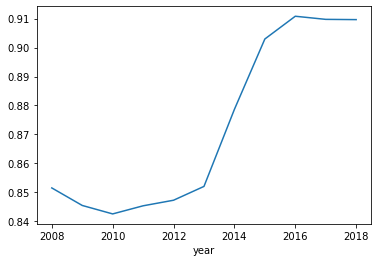

In [26]:
# Since we have the year as the index, we can select the column we want to plot as a time series
df_covshare['share_covered'].plot()

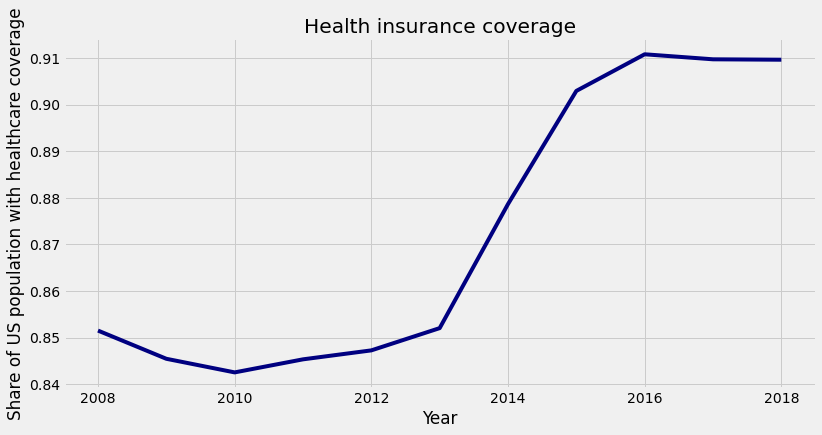

In [27]:
# We can add more information 
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,6))
plt.plot('share_covered', data=df_covshare, color = 'navy')
plt.xlabel('Year')
plt.ylabel('Share of US population with healthcare coverage')
plt.title('Health insurance coverage')
plt.show()

In [ ]:
# Exercise: 
# Try on your own to make a function that takes a single variable from the raw df, provides some meaningful 
# time series summary, and creates a plot, all in one!